# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

In [1]:
#Problems
#1. When you run question 1 first time it bugs
#Question 1 says "Illustrate". I think they want a graph even though a tabel is easier to read. 
#What is run regression for?
#Correct everything to english
#Question 2 has wrong test

Imports and set magics:

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdSpecializationModel as model


# Initialize class
hsm = model.HouseholdSpecializationModelClass()

# Question 1

**Explain how you solve the model**

In [8]:
#We import the model above. For a start we get the solution. 

#Based on consumer problem in lecture 6. We are looping over the answers
def print_table():
    """this function defines a table that plots the values of HF/HM
    for the specified values of alpha and sigma"""
    
    # a. empty text
    text = ''
    
    text += f'{"Alpha/Sigma":<7s}{"":1s}'

    # b. top header
    for sigma in np.linspace(0.5,1.5,3):
       hsm.par.sigma=sigma
       text += f'{sigma:8.2f}' #have sigma as the column-values
    text += '\n' + '-'*40 + '\n' # we add horizontal separator
    
    # c. body
    for i,alpha in enumerate(np.linspace(0.25,0.75,3)):
        hsm.par.alpha=alpha
        #tilføjer det her for at skippe det første linjeskift, ellers så kommer der en tom linje som den første række i tabellen. 
        if i > 0: 
            text += '\n'
        text += f'{alpha:10.2f} |' #alpha as row-values and with a vertical separator
        for sigma in np.linspace(0.5,1.5,3): 
            hsm.par.sigma=sigma
            dsol = hsm.solve_discrete() #call the solve function
            text += f'{dsol.HF_HM:8.2f}' #plot values 
    
    #d. reset values of alpha and sigma:
    
    hsm.par.alpha = 0.5
    hsm.par.sigma = 1.0
    
    # e. print
    print(f"Table of HF/HM values:\n{text}")

print_table()

c:\Users\Ander\OneDrive - University of Copenhagen\Kandidat\1. semester\Introduction to Programming and Numerical Analysis\Python\projects-2023-andershuus_christianfogel\inauguralproject\HouseholdSpecializationModel.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  else:
c:\Users\Ander\OneDrive - University of Copenhagen\Kandidat\1. semester\Introduction to Programming and Numerical Analysis\Python\projects-2023-andershuus_christianfogel\inauguralproject\HouseholdSpecializationModel.py:63: RuntimeWarning: divide by zero encountered in reciprocal
  H= ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+


Table of HF/HM values:
Alpha/Sigma     0.50    1.00    1.50
----------------------------------------
      0.25 |    0.55    0.31    0.21
      0.50 |    1.00    1.00    1.00
      0.75 |    1.83    3.25    4.67


# Question 2

Explain your code and procedure

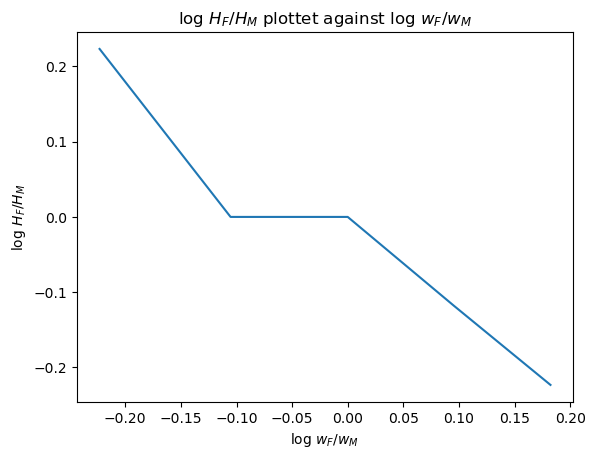

In [9]:
# a. create the figure
fig = plt.figure() 
#first we create a figure object by initializing the plt.figure

# b. plot
ax = fig.add_subplot(1,1,1) 
#we only add one subplot so the ax is basically the entire figure.

ax.plot(np.log(hsm.par.wF_vec),hsm.solve_wF_vec(discrete=True)) 
#x-axis: we plot log(wF_vec), since wM is fixed at 1, 
#so it is already taken into account in this vector.
#Note: we only take the log here, so we don't need to store the log values
#y-axis: we call the solve_wF_vec method from our class directly,
#so we again don't need to store the values.
#Note: Here we call the discrite solving method.

ax.set_title('log $H_F/H_M$ plottet against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #set label for x-axis
ax.set_ylabel('log $H_F/H_M$'); #set label for y-axis

# Question 3

Explain your code and procedure

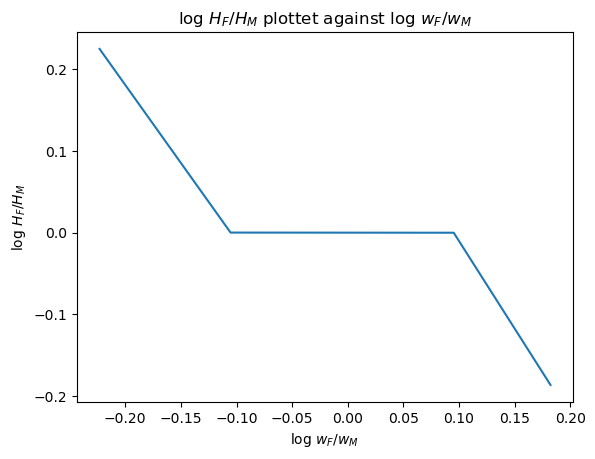

In [40]:
# a. create the figure
fig = plt.figure() 
#first we create a figure object by initializing the plt.figure

# b. plot
ax = fig.add_subplot(1,1,1) 
#we only add one subplot so the ax is basically the entire figure.

ax.plot(np.log(hsm.par.wF_vec),hsm.solve_wF_vec(discrete=False)) 
#x-axis: we plot log(wF_vec), since wM is fixed at 1, 
#so it is already taken into account in this vector.
#Note: we only take the log here, so we don't need to store the log values
#y-axis: we call the solve_wF_vec method from our class directly,
#so we again don't need to store the values.
#Note: now we call discrete = False, because we want it to use the
#continous solving method.

ax.set_title('log $H_F/H_M$ plottet against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #set label for x-axis
ax.set_ylabel('log $H_F/H_M$'); #set label for y-axis

# Question 4

In [36]:
beta0=np.zeros((10,10))
beta1=np.zeros((10,10))
target=np.zeros((10,10))
target_best=10**6
alpha_best=0
sigma_best=0
for i, alpha in enumerate(np.linspace(0.0,1.0,20)):
    hsm.par.alpha=alpha
    for j, sigma in enumerate(np.linspace(0.0,1.5,20)): 
        hsm.par.sigma=sigma
        hsm.run_regression()
        target_new=(hsm.par.beta0_target-hsm.opt.beta0)**2+(hsm.par.beta1_target-hsm.opt.beta1)**2
        if target_new<target_best:
            target_best=target_new
            alpha_best=alpha
            sigma_best=sigma
        else: 
            target_best=target_best
            alpha_best=alpha_best
            sigma_best=sigma_best
#Returning values
hsm.par.alpha=0.5
hsm.par.sigma=1.0
hsm.par.wF=1.0

c:\Users\Ander\OneDrive - University of Copenhagen\Kandidat\1. semester\Introduction to Programming and Numerical Analysis\Python\projects-2023-andershuus_christianfogel\inauguralproject\HouseholdSpecializationModel.py:169: RuntimeWarning: divide by zero encountered in log
  log_HF_HM[i] = np.log(opt.HF_HM)
c:\Users\Ander\OneDrive - University of Copenhagen\Kandidat\1. semester\Introduction to Programming and Numerical Analysis\Python\projects-2023-andershuus_christianfogel\inauguralproject\HouseholdSpecializationModel.py:63: RuntimeWarning: overflow encountered in double_scalars
  H= ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+
c:\Users\Ander\OneDrive - University of Copenhagen\Kandidat\1. semester\Introduction to Programming and Numerical Analysis\Python\projects-2023-andershuus_christianfogel\inauguralproject\HouseholdSpecializationModel.py:63: RuntimeWarning: invalid value encountered in double_scalars
  H= ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+
c:\Users\Ander\OneDrive - Un

In [38]:
print(f'Optimal value of alpha = {alpha_best:.2f}')
print(f'Optimal value of sigma = {sigma_best:.2f}')
print(f'Value of target function = {target_best:.2f}')


Optimal value of alpha = 0.89
Optimal value of sigma = 0.17
Value of target function = 0.01


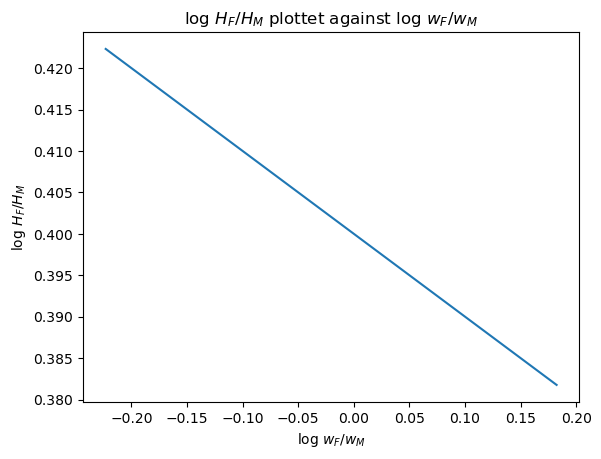

In [4]:
# a. create the figure
fig = plt.figure() 
#first we create a figure object by initializing the plt.figure

# b. plot
ax = fig.add_subplot(1,1,1) 
#we only add one subplot so the ax is basically the entire figure.

ax.plot(np.log(hsm.par.wF_vec),hsm.par.beta0_target+hsm.par.beta1_target*np.log(hsm.par.wF_vec)) 
#x-axis: we plot log(wF_vec), since wM is fixed at 1, 
#so it is already taken into account in this vector.
#Note: we only take the log here, so we don't need to store the log values
#y-axis: we call the solve_wF_vec method from our class directly,
#so we again don't need to store the values.
#Note: now we call discrete = False, because we want it to use the
#continous solving method.

ax.set_title('log $H_F/H_M$ plottet against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #set label for x-axis
ax.set_ylabel('log $H_F/H_M$'); #set label for y-axis

ADD CONCISE CONLUSION.

# Question 5

In [ ]:
log_HF_HM_best=np.zeros(hsm.par.wF_vec.size)
target_best=10**6
sigma_best=0
for j, sigma in enumerate(np.linspace(0.0,1.5,100)): 
    hsm.par.sigma=sigma
    hsm.run_regression()
    target_new=(hsm.par.beta0_target-hsm.opt.beta0)**2+(hsm.par.beta1_target-hsm.opt.beta1)**2
    if target_new<target_best:
        target_best=target_new
        sigma_best=sigma
        log_HF_HM_best=hsm.solve_wF_vec(discrete=False)
            
    else: 
        target_best=target_best
        sigma_best=sigma_best
        log_HF_HM_best=log_HF_HM_best
#Returning values
hsm.par.sigma=1.0
hsm.par.wF=1.0

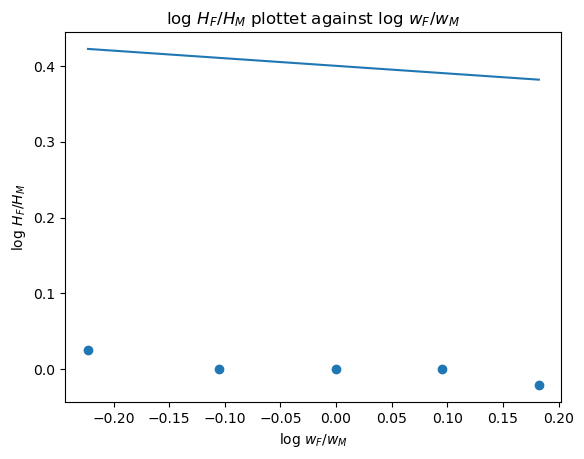

In [ ]:
# a. create the figure
fig = plt.figure() 
#first we create a figure object by initializing the plt.figure

# b. plot
ax = fig.add_subplot(1,1,1) 
#we only add one subplot so the ax is basically the entire figure.

ax.plot(np.log(hsm.par.wF_vec),hsm.par.beta0_target+hsm.par.beta1_target*np.log(hsm.par.wF_vec))
ax.scatter(np.log(hsm.par.wF_vec),log_HF_HM_best) 


ax.set_title('log $H_F/H_M$ plottet against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #set label for x-axis
ax.set_ylabel('log $H_F/H_M$'); #set label for y-axis

If alpha is assumed to be 0.5, then we assume that productivity for working at home is the same for both men and women. If that is not the case, which question 4 suggests, then this assumption will result in a poorer fit, because in question 4 we find that women are more productive than men, since alpha was 0.9.